In [1]:
import numpy as np           
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
import sys
import os
# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
import google_drive as gd
from build_pipeline import build_pipeline


from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


c:\Users\lilla\OneDrive\Desktop\MAL\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net_migration['Country_Name'].replace({
c:\Users\lilla\OneDrive\Desktop\MAL\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [2]:
X_test, y_test, X_train, y_train, X_val, y_val = build_pipeline()


c:\Users\lilla\OneDrive\Desktop\MAL\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net_migration['Country_Name'].replace({


In [3]:
# Drop non-numeric columns 'Country_Name'
X_train = X_train.drop(columns=['Country_Name'], errors='ignore')
X_val = X_val.drop(columns=['Country_Name'], errors='ignore')
X_test = X_test.drop(columns=['Country_Name'], errors='ignore')

# SVM/SVR

In [4]:
#Default 
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)


In [5]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    print("-" * 30)

In [6]:
# Evaluate SVM
evaluate_model(y_val, y_pred_svm, "Support Vector Machine")

Support Vector Machine Performance:
  RMSE: 0.5776
  R2 Score: 0.7651
------------------------------


Hyperparameter tuning

In [7]:
#RandomizedSearchCV

# Define parameter distributions
param_distributions = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'gamma': uniform(0.001, 1),  # Uniform distribution between 0.001 and 1
    'epsilon': uniform(0.1, 0.5)  # Uniform distribution between 0.1 and 0.5
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVR(kernel='rbf'),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_svm_model = random_search.best_estimator_

print("Best parameters found: ", best_params)

y_val_pred = best_svm_model.predict(X_val)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.0s
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.0s
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.0s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.0s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.0s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] E

In [8]:
# Evaluate RadnomizedSearch SVM
evaluate_model(y_val, y_val_pred, "RandomizedSearch SVM")

RandomizedSearch SVM Performance:
  RMSE: 0.5505
  R2 Score: 0.7866
------------------------------


# Gradient Boosted

In [9]:
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [10]:
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [11]:
y_pred_gbm = gbm_model.predict(X_val)


In [12]:
evaluate_model(y_val, y_pred_gbm, "Gradient Boosted Model")


Gradient Boosted Model Performance:
  RMSE: 0.5618
  R2 Score: 0.7778
------------------------------


Hyperparameter Tuning

In [13]:
#Define parameter distributions
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

# Fit to training data
random_search_gbm.fit(X_train, y_train)

# Get the best parameters and model
best_params_gbm = random_search_gbm.best_params_
best_gbm_model = random_search_gbm.best_estimator_

print("Best parameters found: ", best_params_gbm)

# Evaluate the best GBM model on validation set
y_val_pred_gbm = best_gbm_model.predict(X_val)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=

In [14]:
evaluate_model(y_val, y_val_pred_gbm, "Tuned Gradient Boosted Model")

Tuned Gradient Boosted Model Performance:
  RMSE: 0.5595
  R2 Score: 0.7796
------------------------------


In [15]:
# Test Set Predictions
y_test_pred_svr = best_svm_model.predict(X_test)
y_test_pred_gbm = best_gbm_model.predict(X_test)

# Evaluate SVM on Test Set
evaluate_model(y_test, y_test_pred_svr, "Tuned SVR on Test Set")

# Evaluate GBM on Test Set
evaluate_model(y_test, y_test_pred_gbm, "Tuned GBM on Test Set")


Tuned SVR on Test Set Performance:
  RMSE: 0.5943
  R2 Score: 0.7079
------------------------------
Tuned GBM on Test Set Performance:
  RMSE: 0.6068
  R2 Score: 0.6956
------------------------------


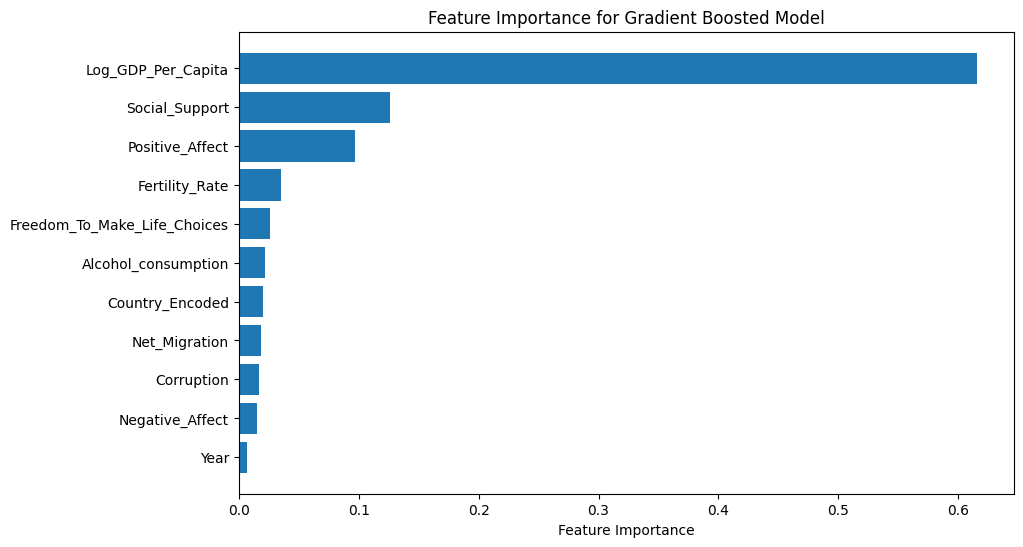

In [16]:
# Feature Importance for GBM
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    sorted_idx = importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance for Gradient Boosted Model")
    plt.show()

plot_feature_importance(best_gbm_model, X_train.columns)


In [22]:
feature_importance = best_gbm_model.feature_importances_
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")


Year: 0.0072
Log_GDP_Per_Capita: 0.6155
Social_Support: 0.1264
Freedom_To_Make_Life_Choices: 0.0258
Corruption: 0.0167
Positive_Affect: 0.0968
Negative_Affect: 0.0154
Alcohol_consumption: 0.0219
Fertility_Rate: 0.0354
Net_Migration: 0.0187
Country_Encoded: 0.0201


In [23]:
# Retain only significant features
significant_features = [
    'Log_GDP_Per_Capita',
    'Social_Support',
    'Positive_Affect',
    'Fertility_Rate',
    'Freedom_To_Make_Life_Choices'  # Optional based on threshold
]

X_train_filtered = X_train[significant_features]
X_val_filtered = X_val[significant_features]
X_test_filtered = X_test[significant_features]

# Train Gradient Boosted Model on filtered dataset
gbm_filtered_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_filtered_model.fit(X_train_filtered, y_train)

# Evaluate on validation set
y_val_pred_gbm_filtered = gbm_filtered_model.predict(X_val_filtered)
evaluate_model(y_val, y_val_pred_gbm_filtered, "Filtered Gradient Boosted Model")

# Train Support Vector Machine on filtered dataset
svm_filtered_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_filtered_model.fit(X_train_filtered, y_train)

# Evaluate on validation set
y_val_pred_svm_filtered = svm_filtered_model.predict(X_val_filtered)
evaluate_model(y_val, y_val_pred_svm_filtered, "Filtered Support Vector Machine")


Filtered Gradient Boosted Model Performance:
  RMSE: 0.5965
  R2 Score: 0.7495
------------------------------
Filtered Support Vector Machine Performance:
  RMSE: 0.5789
  R2 Score: 0.7641
------------------------------


In [18]:
# Define and train a model (example with Random Forest)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)

# Evaluate performance
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"Random Forest: RMSE = {rmse:.4f}, R2 = {r2:.4f}")


Random Forest: RMSE = 0.5936, R2 = 0.7519


In [19]:
feature_importance = rf_model.feature_importances_
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")


Year: 0.0101
Log_GDP_Per_Capita: 0.6621
Social_Support: 0.0637
Freedom_To_Make_Life_Choices: 0.0374
Corruption: 0.0182
Positive_Affect: 0.1053
Negative_Affect: 0.0183
Alcohol_consumption: 0.0181
Fertility_Rate: 0.0295
Net_Migration: 0.0197
Country_Encoded: 0.0176


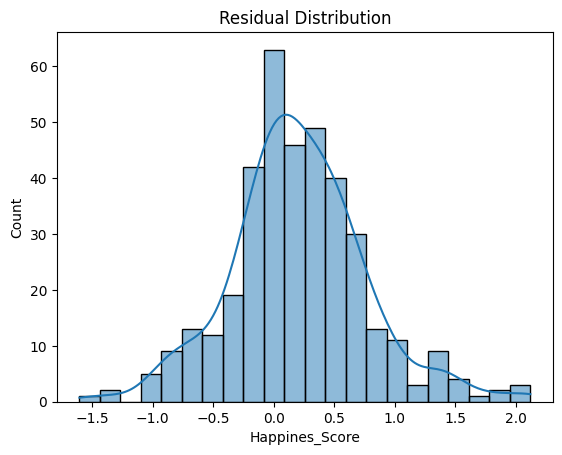

In [20]:
residuals = y_val - y_val_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


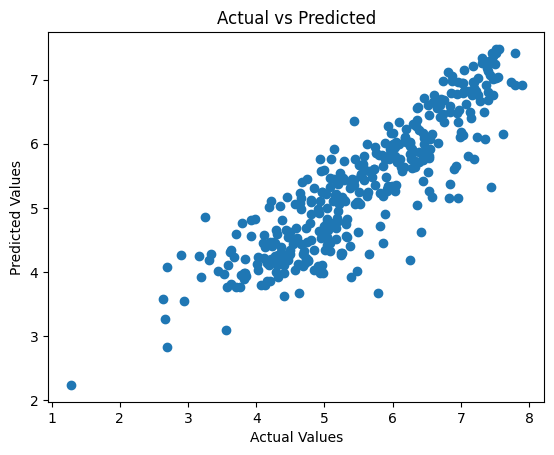

In [21]:
plt.scatter(y_val, y_val_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
